# Script2

# Librairies 

In [106]:
library(vegan)
library(gplots)
library(gclus)

Loading required package: cluster

Registered S3 method overwritten by 'gclus':
  method         from 
  reorder.hclust vegan



# Loading datas

In [75]:
  load("Doubs.RData")  

# Coldiss function

In [103]:
# coldiss()
# Color plots of a dissimilarity matrix, without and with ordering
#
# License: GPL-2
# Author:  Francois Gillet
#          23 August 2012 - rev. 07 June 2016

"coldiss" <- function(D,
                      nc = 4,
                      byrank = TRUE,
                      diag = FALSE) {
  require(gclus)
  
  D <- as.dist(as.matrix(D))
  
  if (max(D) > 1)
    D <- D / max(D)
  
  if (byrank) {
    spe.color <- dmat.color(1 - D, cm.colors(nc))
  }
  else {
    spe.color <- dmat.color(1 - D, byrank = FALSE, cm.colors(nc))
  }
  
  spe.o <- order.single(1 - D)
  speo.color <- spe.color[spe.o, spe.o]
  
  op <- par(mfrow = c(1, 2), pty = "s")
  
  if (diag) {
    plotcolors(
      spe.color,
      rlabels = attributes(D)$Labels,
      main = "Dissimilarity Matrix",
      dlabels = attributes(D)$Labels
    )
    plotcolors(
      speo.color,
      rlabels = attributes(D)$Labels[spe.o],
      main = "Ordered Dissimilarity Matrix",
      dlabels = attributes(D)$Labels[spe.o]
    )
  }
  else {
    plotcolors(spe.color, rlabels = attributes(D)$Labels,
               main = "Dissimilarity Matrix")
    plotcolors(speo.color,
               rlabels = attributes(D)$Labels[spe.o],
               main = "Ordered Dissimilarity Matrix")
  }
  
  par(op)
}

# Usage:
# coldiss(D = dissimilarity.matrix, nc = 4, byrank = TRUE, diag = FALSE)
# If D is not a dissimilarity matrix (max(D) > 1), then D is divided by max(D)
# nc 							number of colours (classes)
# byrank = TRUE		equal-sized classes
# byrank = FALSE	equal-length intervals
# diag = TRUE			print object labels also on the diagonal

# Example:
# coldiss(spe.dj, nc = 9, byrank = FALSE, diag = TRUE)

# Useful functions

In [150]:
# modification of image() to include row and column axis labels
image.real <- function(mat) { 
  mat <- t(mat)[,nrow(mat):1]
  image(mat, axes = FALSE, col = hcl.colors(15, palette="viridis"))
  axis(1, at = seq(0, 1, length = nrow(mat)), labels = rownames(mat), las=2)
  axis(2, at = seq(0, 1, length = ncol(mat)), labels = colnames(mat))
  box() 
}


# Function to display a histogram on the diagonal panels of a pairs plot
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y / max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

#  Function to display the correlation coefficient in the upper panels of a pairs plot
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if (missing(cex.cor)) cex.cor <- 0.8 / strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}


# 0 Simulate Datas ->(*rnorm(),runif(),gl(),data.frame()*)

## 0.1 Generates `n` random values according to a normal (Gaussian) distribution → *rnorm(n, mean, sd)*

- **n** → *Number of values to generate*  
- **mean** → *Mean (center) of the distribution*  
- **sd** → *Standard deviation (spread) of the distribution*  


In [12]:
# Generate 30 random values from a standard normal distribution (mean = 0, sd = 1)
g1 <- rnorm(30, mean = 0, sd = 1)

g1

mean(g1)
sd(g1)

# Visualize the distribution
#hist(g1, main = "g1 ~ N(0,1)", col = "lightgray", border = "white") <---  ### Uncomment this line to see the histograam ###


[1]  0.41397440 -0.40103658 -0.04731932  0.81803461  0.71246750  0.89161567
 [7] -0.44684756  1.51004779 -1.06452217  0.76023113 -0.96883607  0.14964641
[13] -0.87767223 -0.33676686  0.75579123 -0.28647878 -0.03840591  2.28626377
[19]  0.56932094 -0.22113727  1.12861537  0.31953768  2.08649758  0.90067554
[25]  0.76862860  1.27737734 -0.79667789  1.69062919 -1.53266584 -1.58446882

[1] 0.2812173

[1] 1.005844

## 0.2 Generates `n` random values from a uniform distribution → *runif(n, min, max)*

- **n** → *Number of values to generate*  
- **min** → *Minimum value of the range*  
- **max** → *Maximum value of the range*  


In [10]:
# Generate 30 random values from a uniform distribution between 0 and 5
g2 <- runif(30, min = 0, max = 5)

g2

# Plot a histogram of the generated values
#hist(g2, main = "g2 ~ Uniform(0,5)", col = "lightblue", border = "white") <---  ### Uncomment this line to see the distribution ###


[1] 0.89201819 0.02726416 4.13094937 0.51181966 4.20873103 2.96377262
 [7] 2.16329946 3.35628640 4.64389093 1.55111299 0.31723968 2.45451676
[13] 3.42738821 3.62768447 0.11551236 4.24551960 3.03447555 4.23591321
[19] 3.12588649 3.83754179 1.49416498 3.66843885 3.21850389 0.87745550
[25] 4.27666839 0.61380171 3.66760839 3.41695478 1.87180776 3.80721288

## 0.3 Creates a factor with repeated levels → *gl(n, k, length, labels)*

- **n** → *Number of levels (distinct groups)*  
- **k** → *Number of repetitions per level*  
- **length** → *Total number of values (optional)*  
- **labels** → *Names of the levels (e.g., "A", "B")* 

In [17]:
# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
g3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
g4 <- gl(2, 5, 30, labels = c("D", "E"))

print(g3)

print(g4)

 [1] A A A A A A A A A A B B B B B B B B B B C C C C C C C C C C
Levels: A B C
 [1] D D D D D E E E E E D D D D D E E E E E D D D D D E E E E E
Levels: D E


## 0.4 Creates a data frame → *data.frame(...)*

df<-data.frame(colname1 = vector1,
            col2 = vector2,
            .....,
            coln = vectorn
            )
- **...** → *Named vectors or variables to include as columns*  
- **row.names** → *Optional: names for the rows*  



In [15]:
# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(g1, g2, g3, g4)
head(dat)

,g1,g2,g3,g4
,<dbl>,<dbl>,<fct>,<fct>
1,0.41397440,0.89201819,A,D
2,-0.40103658,0.02726416,A,D
3,-0.04731932,4.13094937,A,D
4,0.81803461,0.51181966,A,D
5,0.71246750,4.20873103,A,D
6,0.89161567,2.96377262,A,E


# 1 Data Transfromations -> (*log(), sqrt(df), df^a, decostand(), scale()*)

## 1.1  Log-transformation  (right skewed data) -> *log(df),log(df$col)*

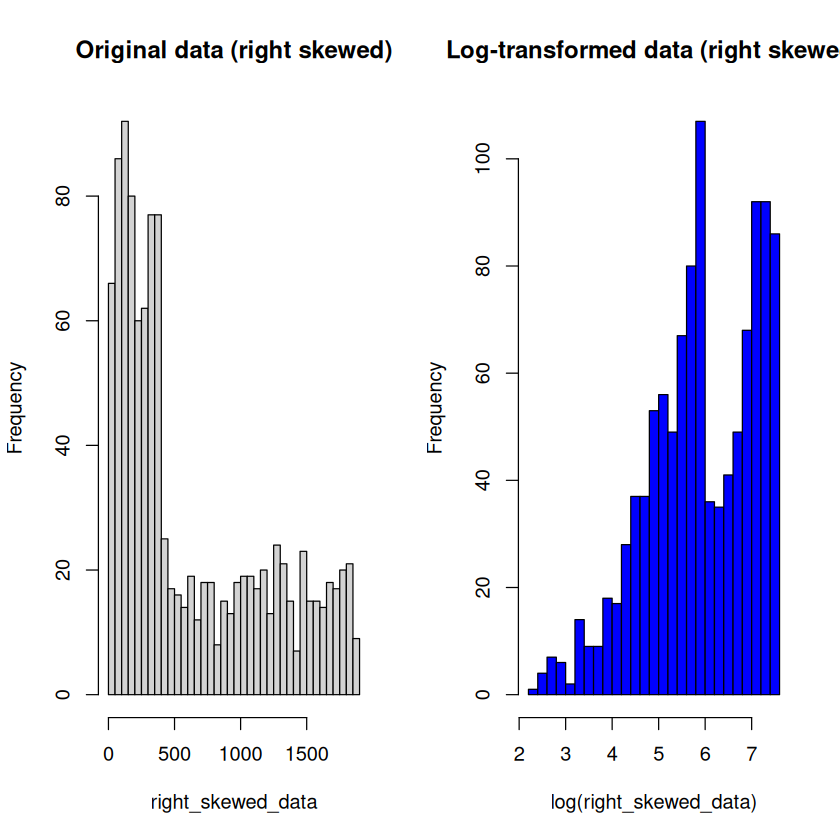

In [95]:
# Create example data frame with right-skewed data
right_skewed_data <- c(runif(600, 10, 400), runif(500, 400, 1900))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist( right_skewed_data, breaks = 30, main = "Original data (right skewed)", col = "lightgray")

# Histogram before transformation 
hist(log(right_skewed_data), breaks = 30, main = "Log-transformed data (right skewed)", col = "blue")


## 1.2  Square-root-transformation (slightly right skewed data) -> *sqrt(df),sqrt(df$col)*

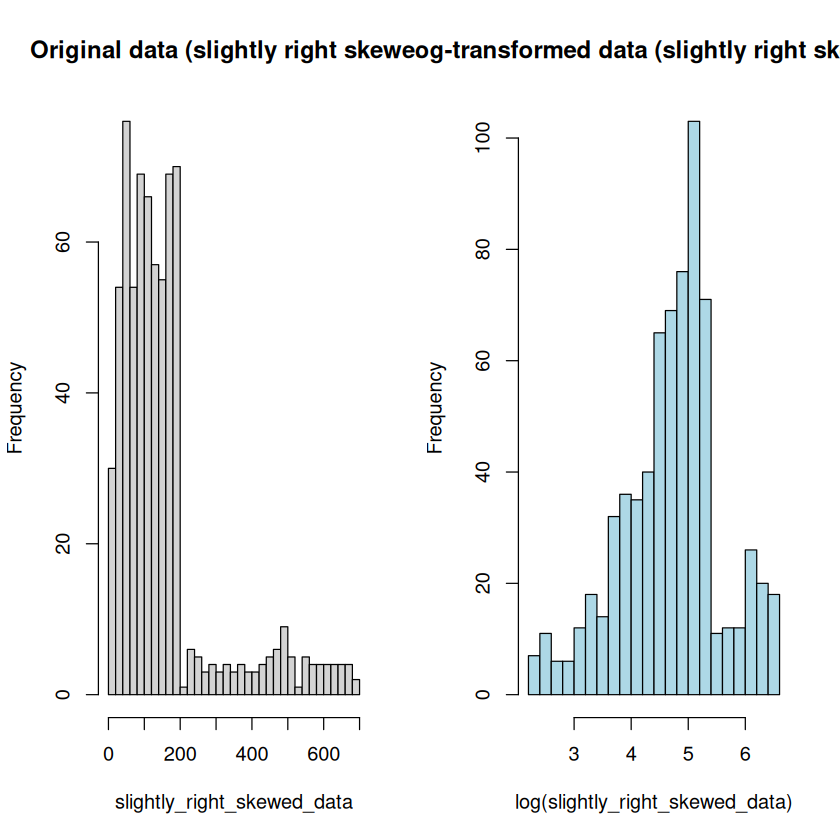

In [98]:
# Create example data frame with slightly right-skewed data
 slightly_right_skewed_data <- c(runif(600, 10, 200), runif(100, 200, 700))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist(slightly_right_skewed_data, breaks = 30, main = "Original data (slightly right skewed)", col = "lightgray")

# Histogram before transformation
hist(log(slightly_right_skewed_data), breaks = 30, main = "Log-transformed data (slightly right skewed)", col = "lightblue")


## 1.3  Power-transformation (left-skewed data) -> *(df)^a,(df$col)^a*

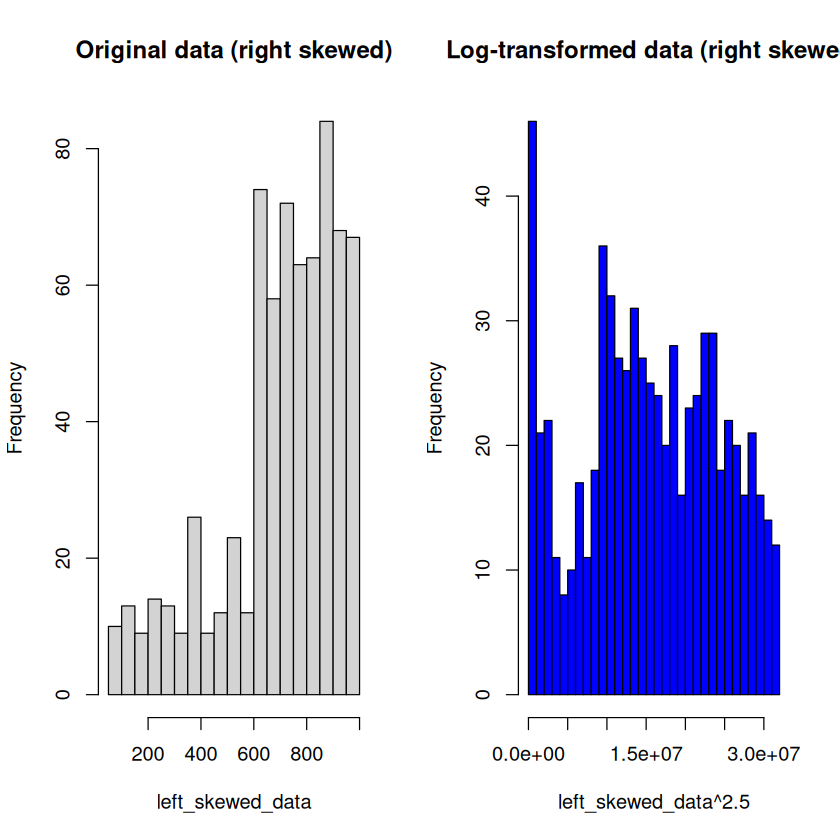

In [86]:
# Create example data frame with left-skewed data
 left_skewed_data <- c(runif(150, 60, 600), runif(550, 600, 1000))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist(left_skewed_data, breaks = 30, main = "Original data (right skewed)", col = "lightgray")

# Histogram before transformation
hist(left_skewed_data^2.5, breaks = 30, main = "Log-transformed data (right skewed)", col = "blue")


## 1.4 Standardization (z-score)

### 1.4.1 Using decostand (standardise the every dataframe columns) -> *decostand(df,"standardize")* (**Return a Dataframe**)


In [72]:
# Create a fake dataset with 3 numeric variables
df <- data.frame(
  Temp = c(15, 18, 20, 22, 19),
  pH = c(6.5, 7.0, 6.8, 7.2, 6.9),
  Conductivity = c(120, 150, 160, 180, 140)
)

# Standardize the variables (z-scores: mean = 0, sd = 1)
df_std1 <- decostand(df, method = "standardize")


# Check that the means are ~0 and standard deviations are ~1
apply(df_std1, 2, mean)# check if means = 0
apply(df_std1, 2, sd)# check if sd = 1

Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

Temp           pH Conductivity 
           1            1            1

### 1.4.2 Using scale -> *scale(df)* (**Return a Matrix**)

In [73]:
# Standardize using base R's scale() function
df_std2 <- as.data.frame(scale(df))

# Check that the means are ~0 and standard deviations are ~1
apply(df_std2, 2, mean)# check if means = 0
apply(df_std2, 2, sd)# check if sd = 1


Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

Temp           pH Conductivity 
           1            1            1

# HOMEWORK : TASK 1  inspect the numerical environmental parameter of the mites dataset (mite.env)
- #Q1: which parameter are numerical?
- #Q2: which parameter requires transformation to improve normality? 
- #Q3: which transformation improves normality?

In [3]:
## Q1 which parameter are numerical? : (hint : sapply(df, class) )
# your code here :


In [81]:
##Q2: which parameter requires transformation to improve normality? (Hint: Use hist())
# your code here :


In [6]:
##Q3: which transformation improves normality? (Hint : use hist(log(df$col)) hist(sqrt(df$col)), hist((df$col)^2)), hist(asin(sqrt(df$col))
# your code here :


# Remmoving empty sites for the rest of the code 

In [108]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]

# 2 Q-mode Distance Matrices & Dissimilarity Matrices for **(semi-)quantitative data** (Bray-curtis, eucl. distance, chrod distance, hellinger distance)->(*vegdist(),dist()*)

## 2.1 Bray-Curtis dissimilarity matrix -> *vegdist(df)* 

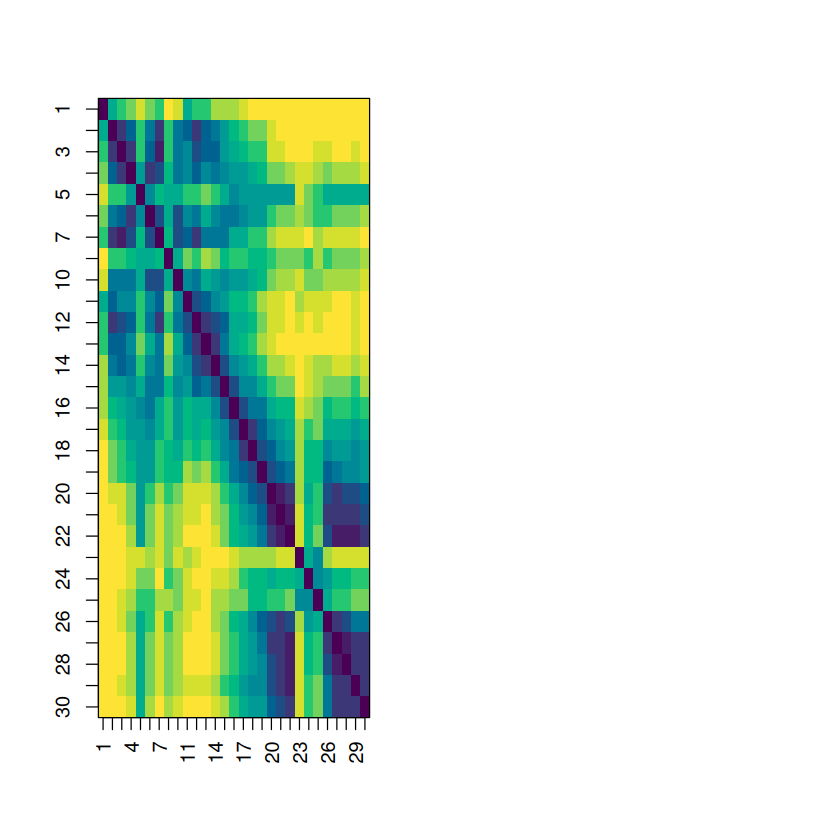

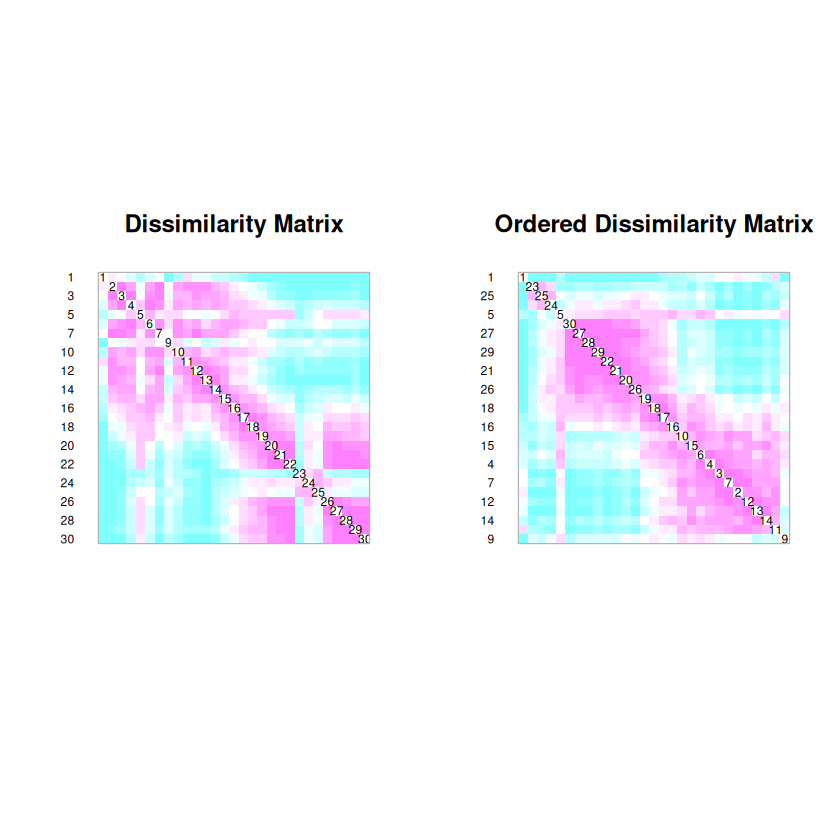

In [124]:
# Percentage difference (aka Bray-Curtis) dissimilarity matrix
# on raw species data. ".db" means "distance Bray".

spe.db <- vegdist(spe)	# method = "bray" (default)

par(mfrow = c(1, 2))

image.real(as.matrix(spe.db))
# custom function coldiss (Francois Gillet)
coldiss(spe.db, nc = 15, diag = TRUE)

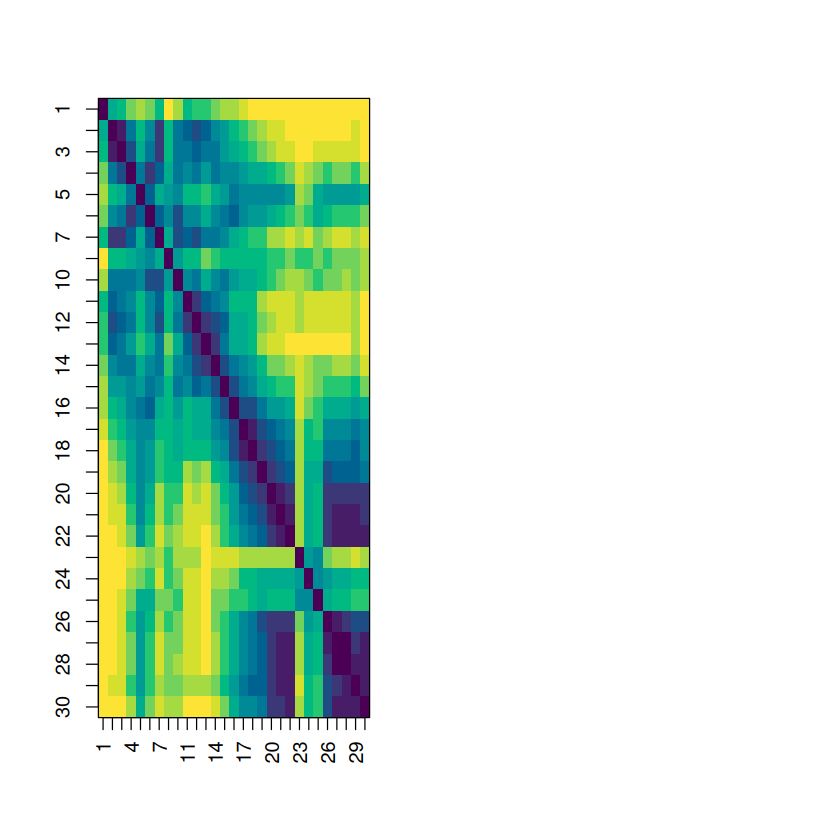

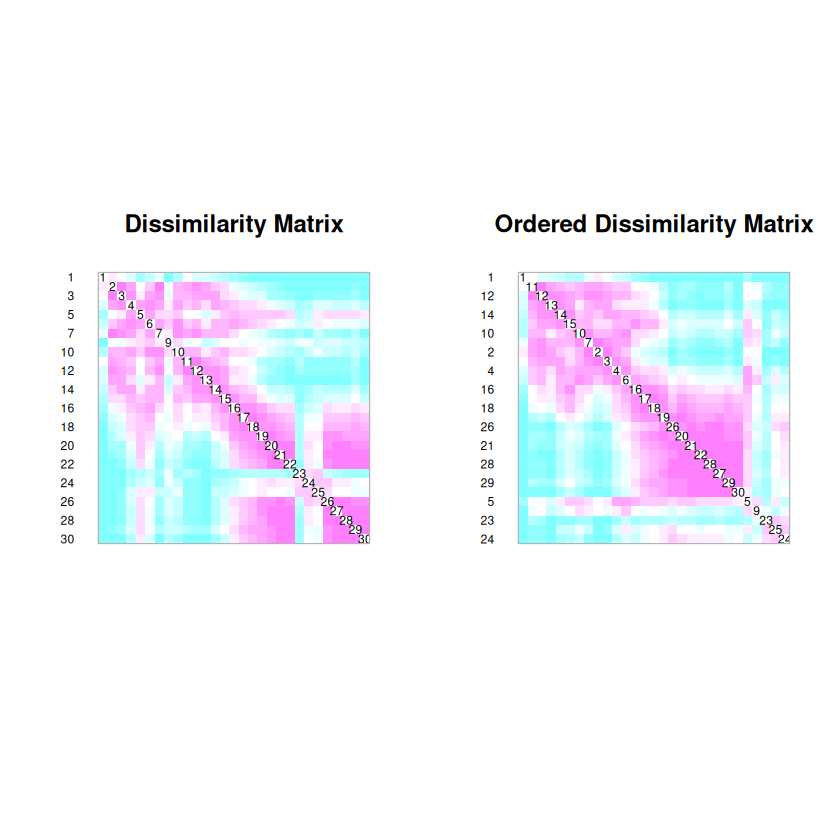

In [125]:
# Percentage difference (aka Bray-Curtis) dissimilarity matrix
# on log-transformed abundances (log(x+1))
spe.dbln <- vegdist(log1p(spe))

par(mfrow = c(1, 2))
image.real(as.matrix(spe.dbln))
# custom function coldiss (Francois Gillet)
coldiss(spe.dbln, nc = 15, diag = TRUE)

## 2.2 Distance matrices -> *dist()*

### 2.2.1 Euclidian distance matrix -> *dist(df)*

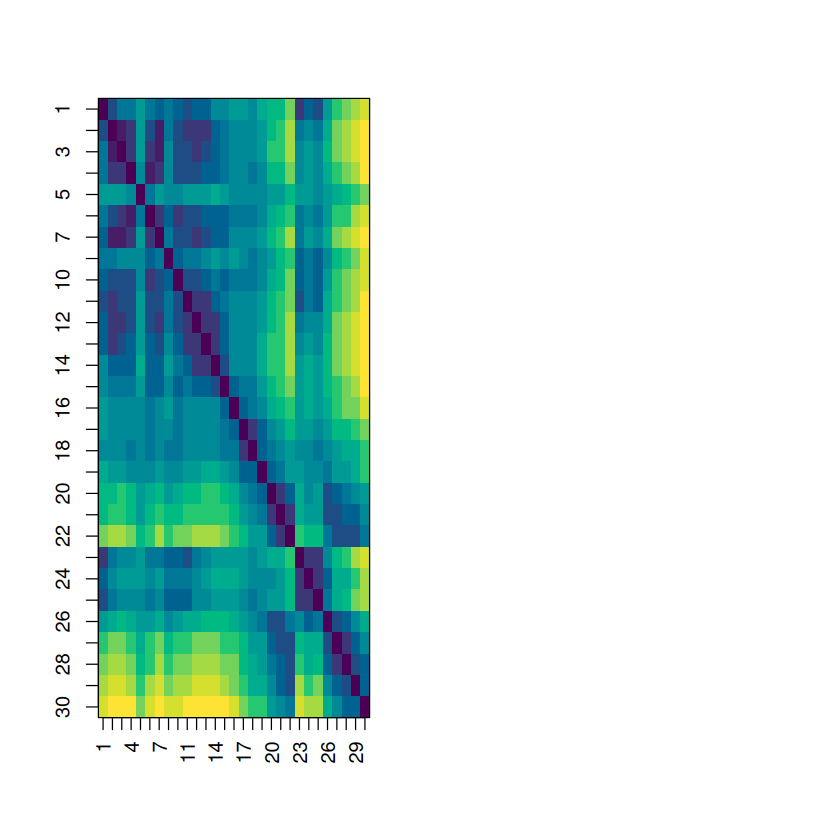

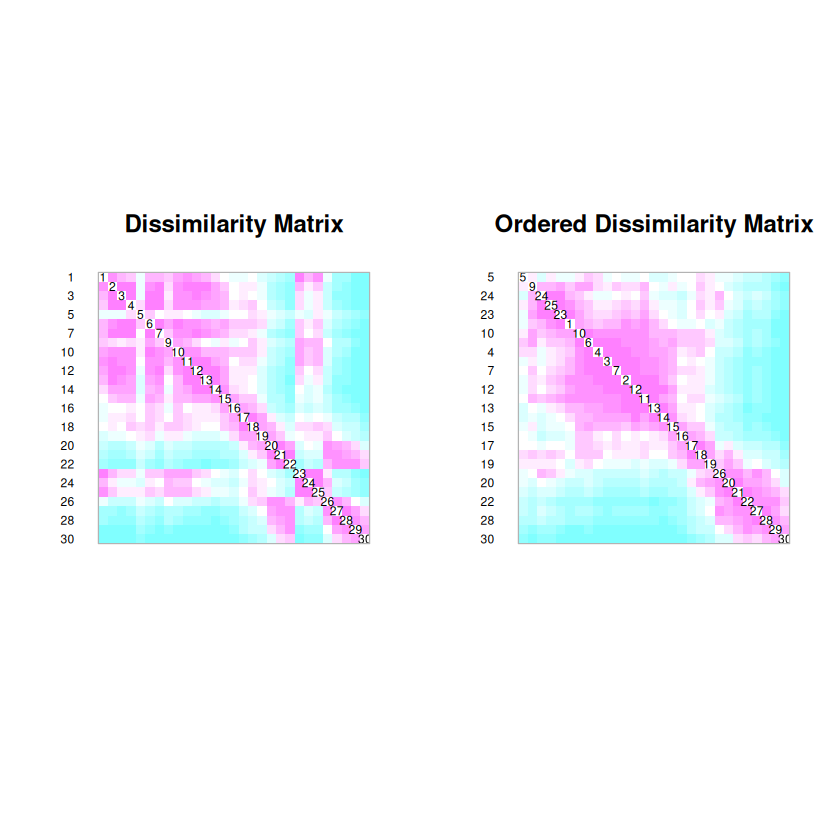

In [128]:
# Compute Euclidean distance matrix
spe.eucl <- dist(spe)

par(mfrow = c(1, 2))
# Visualize the matrix
image.real(as.matrix(spe.eucl))
# custom function coldiss (Francois Gillet)
coldiss(spe.eucl, nc = 15, diag = TRUE)

### 2.2.2 Chord distance matrix -> *dist(df_norm)*

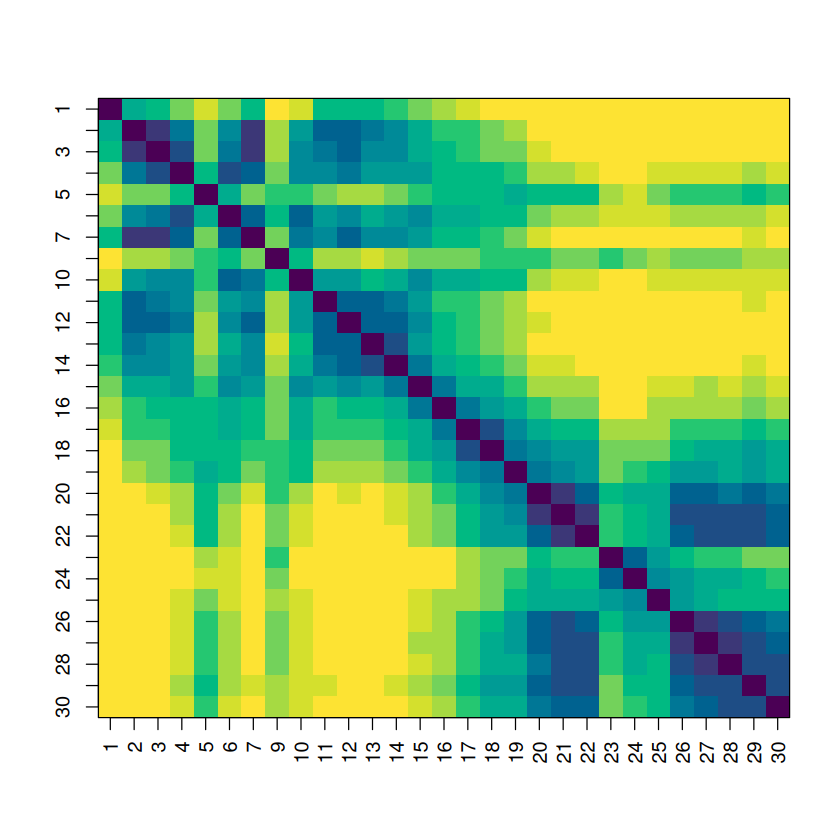

In [123]:
# Chord distance matrix
spe.norm <- decostand(spe, "nor")
spe.dc <- dist(spe.norm)
image.real(as.matrix(spe.dc))

### 2.2.3 Hellinger distance matrix -> dist(df_hel)

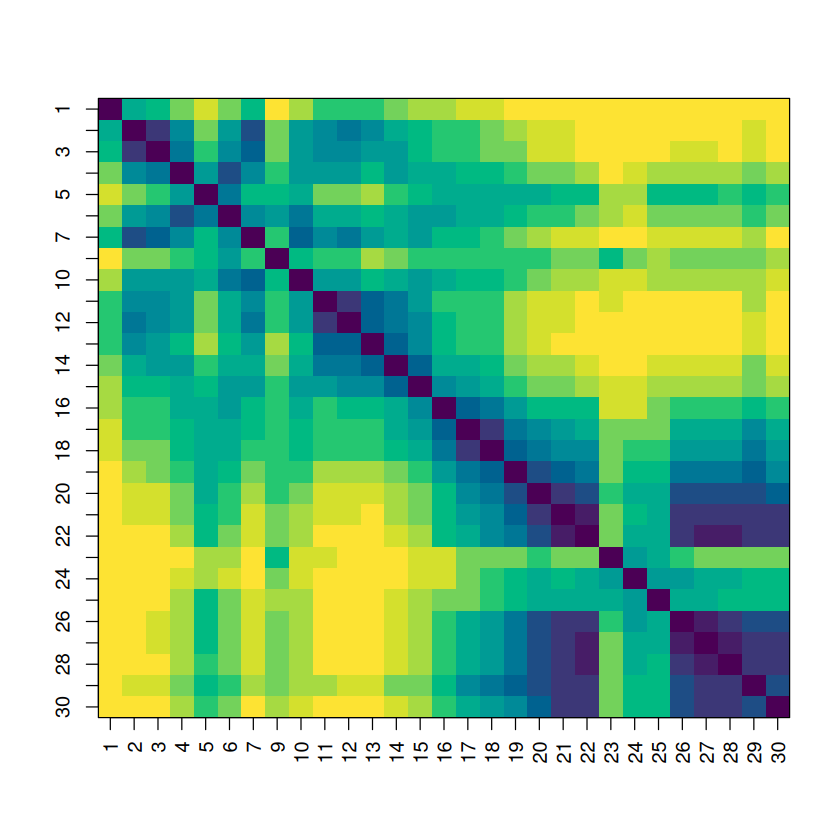

In [129]:
# Hellinger distance matrix
spe.hel <- decostand(spe, "hel")
spe.dh <- dist(spe.hel)
image.real(as.matrix(spe.dh))

# 3  Q-mode dissimilarity measures for **binary data** (Jaccard, Sorensen )->(*vegdist(),dist()*)

## 3.1 Jaccard Dissimilarity matrix -> *vergist() & dist()*

### 3.1.1 Using vergdist() -> *vegdist(df, "jac", binary = TRUE)*

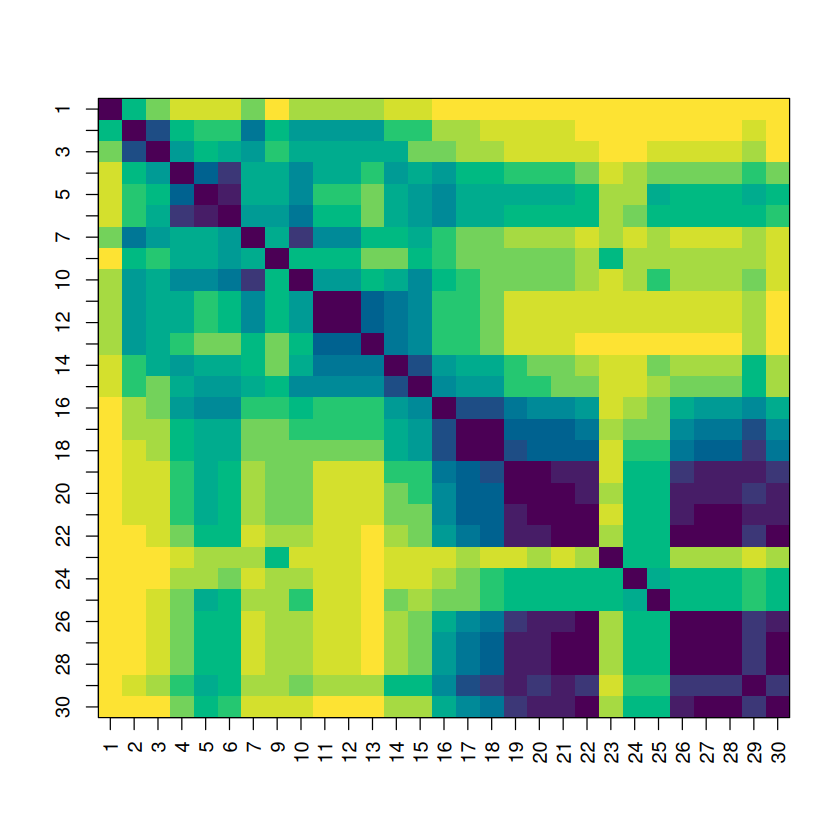

In [130]:
# Jaccard dissimilarity matrix using function vegdist()
spe.dj <- vegdist(spe, "jac", binary = TRUE)
image.real(as.matrix(spe.dj))

### 3.1.2 Using dist() -> *dist(df, "binary")*

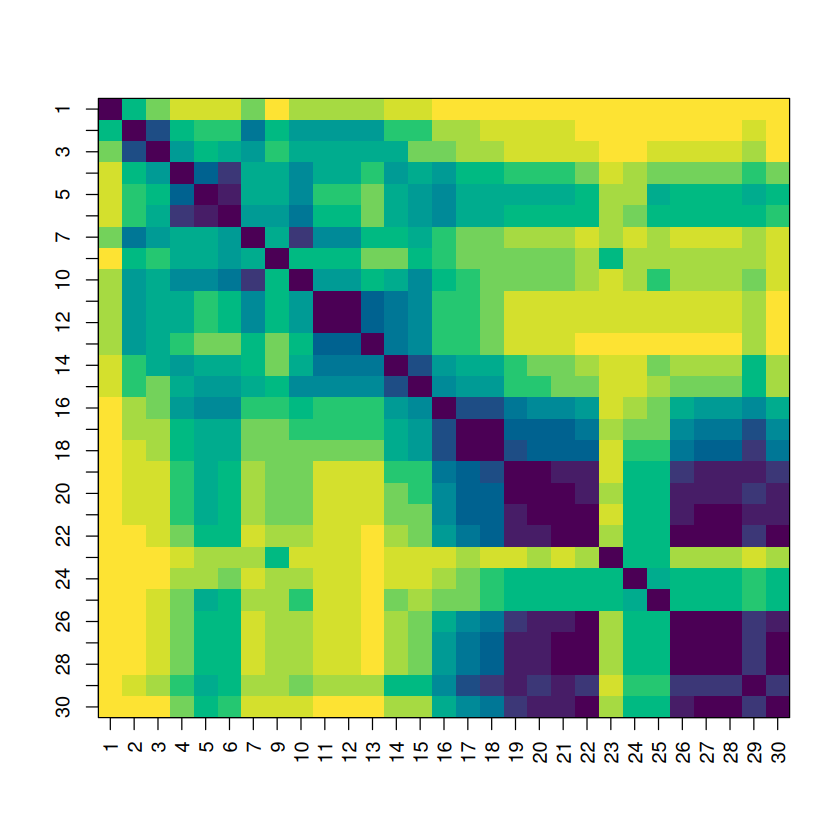

In [132]:
# Jaccard dissimilarity matrix using function dist()
spe.dj2 <- dist(spe, "binary")
image.real(as.matrix(spe.dj2))

## 3.2 Sorensen dissimilarity matrix -> *vegdist(df, method = "bray", binary = TRUE)*

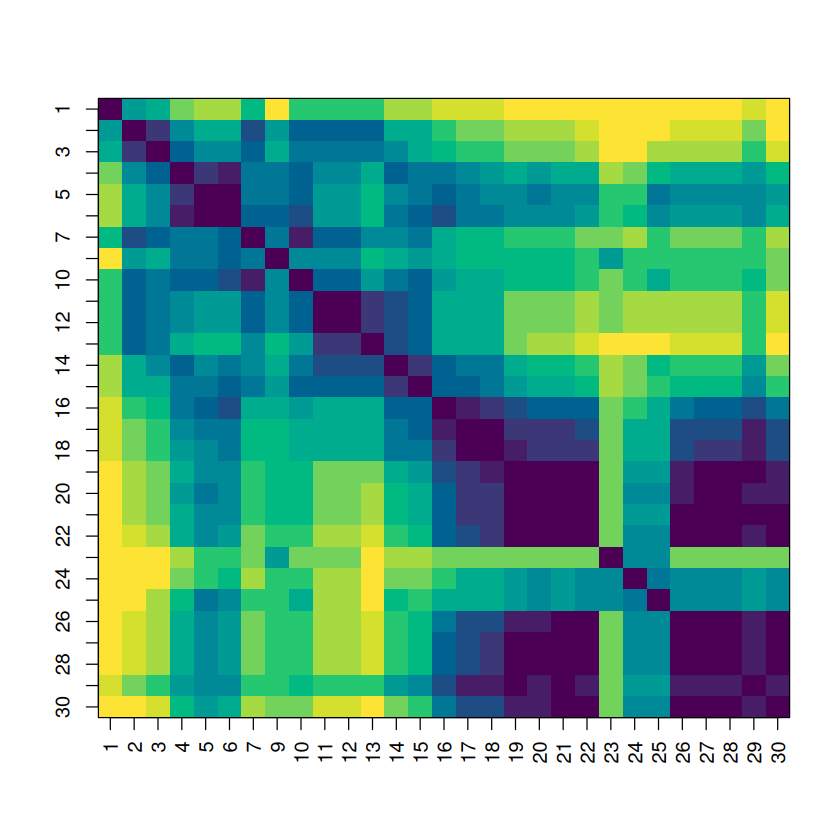

In [133]:
# Sorensen dissimilarity matrix
spe.ds <- vegdist(spe, method = "bray", binary = TRUE)
image.real(as.matrix(spe.ds))

# Compare distance matrices from environmental, species and spatial data

## Remove the 'dfs' variable from the env dataset

In [134]:
# Remove the 'dfs' variable from the env dataset
env2 <- env[, -1]

## Euclidean distance matrix of the standardized env2 data frame

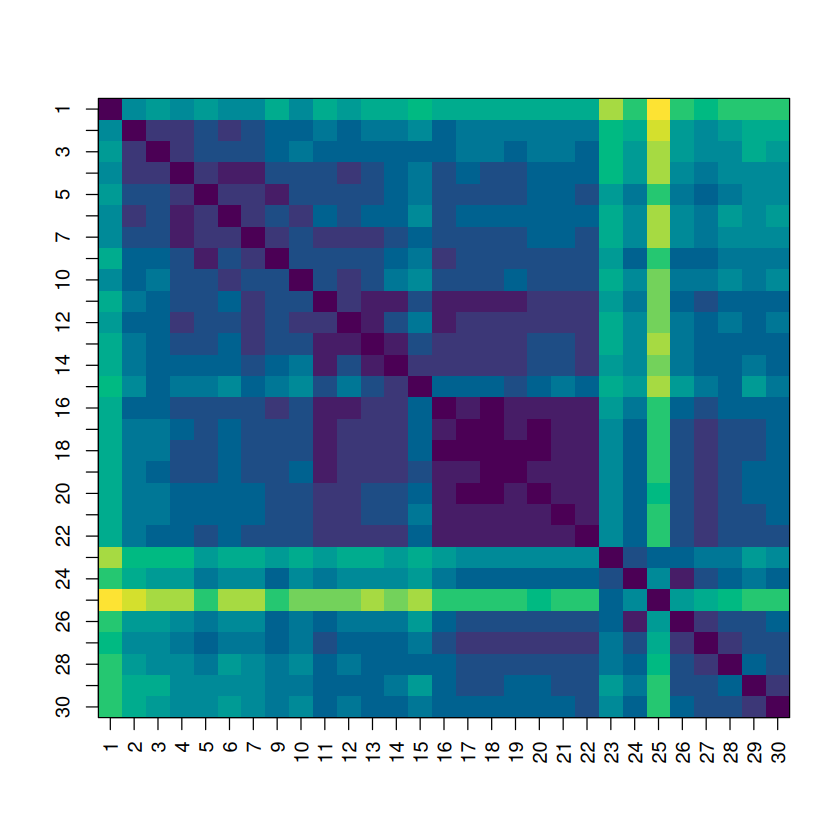

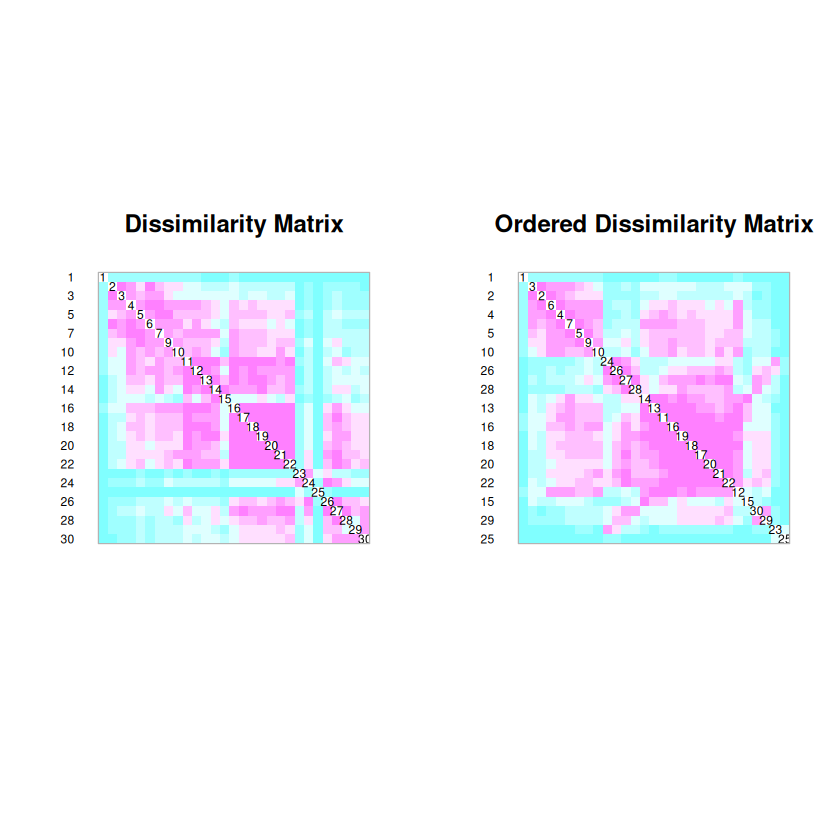

In [136]:
# Euclidean distance matrix of the standardized env2 data frame
env.de <- dist(scale(env2))
image.real(as.matrix(env.de))

coldiss(env.de, nc=8, diag=TRUE)

## Euclidean distance matrix on spatial coordinates (2D)

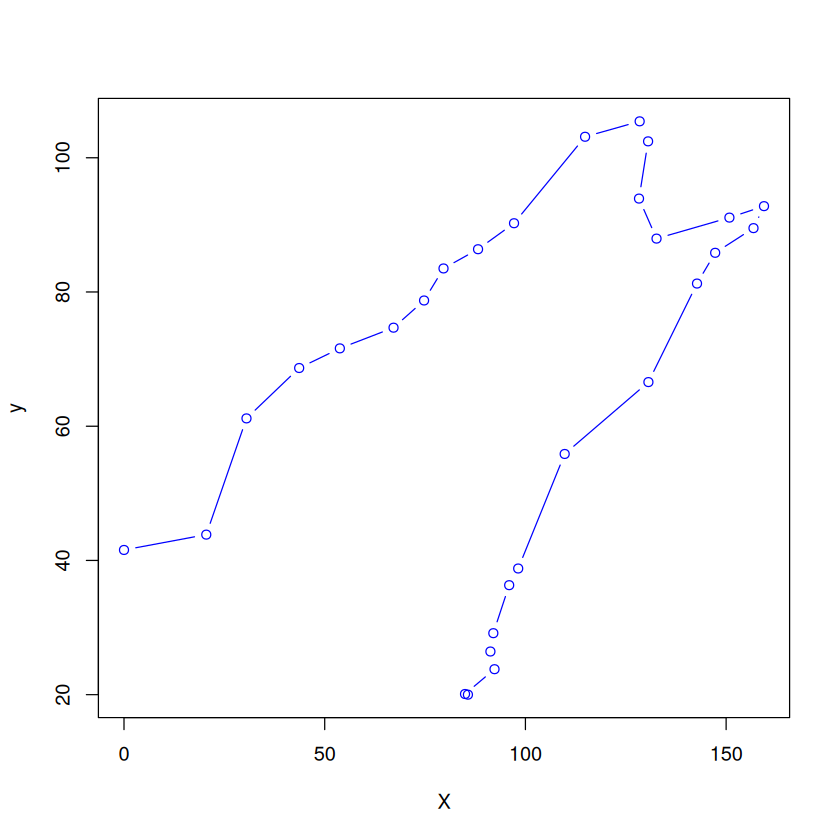

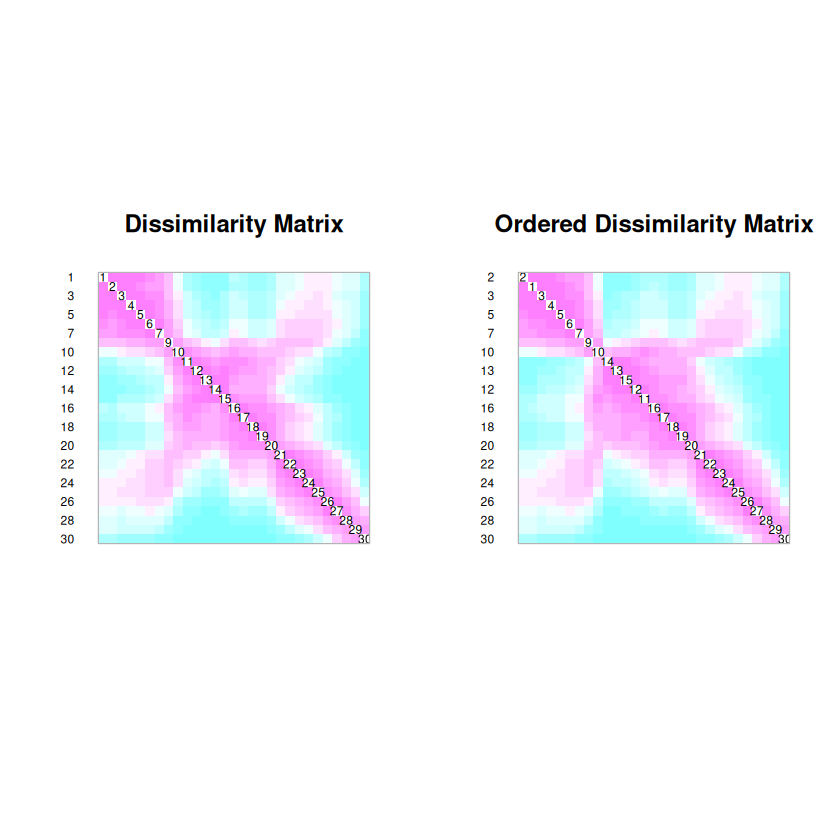

In [137]:
# Euclidean distance matrix on spatial coordinates (2D)
plot(spa$X, spa$Y, type="b", col="blue", xlab="X", ylab="y")
spa.de <- dist(spa)
coldiss(spa.de, nc = 16, diag = TRUE)

## Euclidean distance matrix on distance from the source (1D)

,env$dfs
,<dbl>
1,0.3
2,2.2
3,10.2
4,18.5
5,21.5
6,32.4


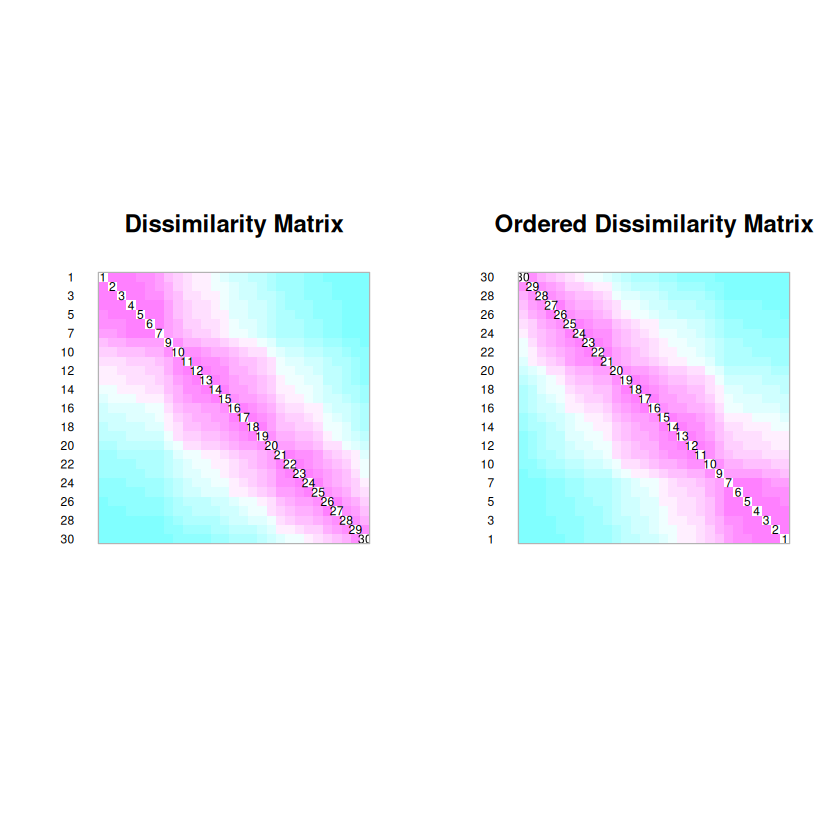

In [135]:
# Euclidean distance matrix on distance from the source (1D)

dfs.df <- as.data.frame(env$dfs, row.names = rownames(env))
head(dfs.df)
riv.de <- dist(dfs.df)
coldiss(riv.de, nc = 16, diag = TRUE)

# 4 Q-mode Gower Dissimilarity Matrix for **Mixed-Type Data** → *daisy()*

## Using daisy() -> *daisy(df,"gower")*

In [138]:
# Fictitious data for Gower index

# Generate 30 random values from a standard normal distribution (mean = 0, sd = 1)
g1 <- rnorm(30, mean = 0, sd = 1)

# Generate 30 random values from a uniform distribution between 0 and 5
g2 <- runif(30, min = 0, max = 5)

# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
g3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
g4 <- gl(2, 5, 30, labels = c("D", "E"))


# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(g1, g2, g3, g4)
head(dat)

,g1,g2,g3,g4
,<dbl>,<dbl>,<fct>,<fct>
1,-1.676498803,0.6840342,A,D
2,-1.109260962,0.2399555,A,D
3,0.298399741,1.3849112,A,D
4,-0.913287524,2.4169574,A,D
5,0.003584912,0.4519673,A,D
6,-0.186782103,2.2312696,A,E


[1] 0.0273136 0.8631347

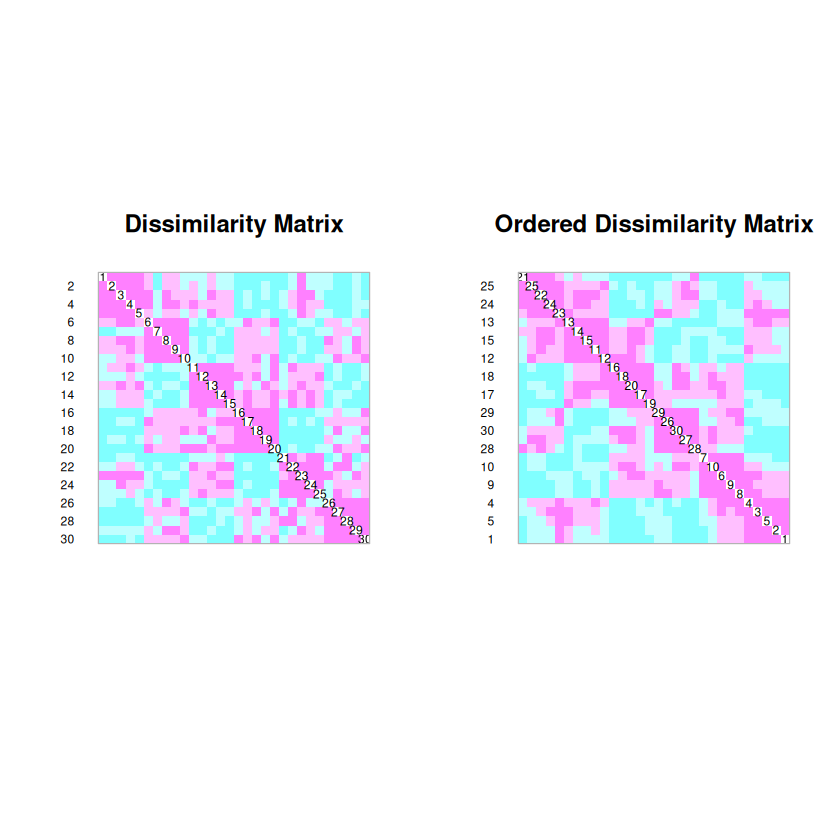

In [139]:
# Complete data matrix (4 variables)
dat_gower <- daisy(dat, "gower")
range(dat_gower)
coldiss(dat_gower, diag = TRUE)

# HOMEWORK : TASK 2: use the mite.spe and plot the Bray-Curtis dissimilarity and Jaccard dissimilariy matrices

- #Q1: visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity?
- #Q2: is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities?
- #Q3: Based on the results to the question above - what can we learn about the distribution of species and their abundance in the mite dataset?

In [142]:
#Q1: visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity? (hint : use vegdist(), coldiss())
# your code here :

In [140]:
#Q2: is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities? (hint : use vegdist(),vegdist(df, "jac", binary = TRUE),coldiss() )
# your code here :

In [141]:
#Q3: Based on the results to the question above - what can we learn about the distribution of species and their abundance in the mite dataset?
# your code here :

# 5 R-mode Correlations Matrices -> (*pairs(),cor(df),cor(df,method=),order.single()*)

## 5.1 Pearson r linear correlation -> *cor(df)* *pairs()*

## 5.1.1 Pearson r linear correlation -> *pairs(df)*

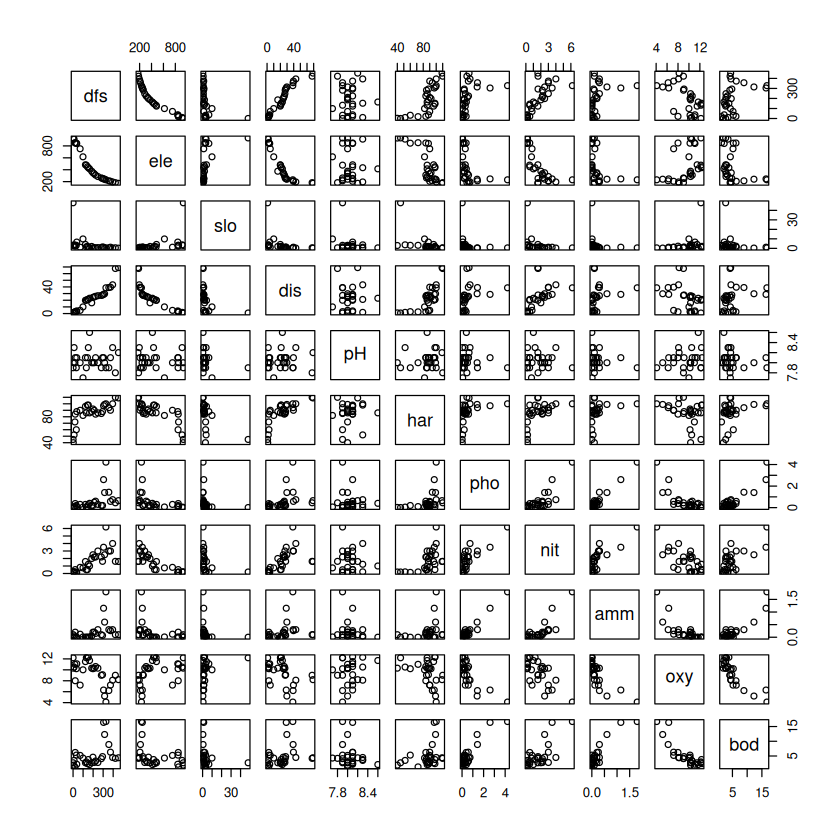

In [144]:
# Creates a scatterplot matrix of all pairwise variable combinations in the 'env' data frame
# Each panel shows a scatterplot of one variable against another
pairs(env) 

## 5.1.2 Pearson r linear correlation -> *cor(df)*

,dfs,ele,slo,dis,pH,har,pho,nit,amm,oxy,bod
dfs,1.00,-0.94,-0.39,0.95,0.02,0.73,0.47,0.74,0.41,-0.57,0.43
ele,-0.94,1.00,0.46,-0.86,-0.05,-0.79,-0.44,-0.75,-0.38,0.42,-0.38
slo,-0.39,0.46,1.00,-0.36,-0.22,-0.53,-0.20,-0.31,-0.17,0.31,-0.17
dis,0.95,-0.86,-0.36,1.00,0.03,0.74,0.38,0.59,0.29,-0.42,0.30
pH,0.02,-0.05,-0.22,0.03,1.00,0.08,-0.08,-0.04,-0.12,0.19,-0.16
har,0.73,-0.79,-0.53,0.74,0.08,1.00,0.37,0.53,0.30,-0.37,0.34
pho,0.47,-0.44,-0.20,0.38,-0.08,0.37,1.00,0.80,0.97,-0.76,0.91
nit,0.74,-0.75,-0.31,0.59,-0.04,0.53,0.80,1.00,0.80,-0.69,0.68
amm,0.41,-0.38,-0.17,0.29,-0.12,0.30,0.97,0.80,1.00,-0.75,0.90
oxy,-0.57,0.42,0.31,-0.42,0.19,-0.37,-0.76,-0.69,-0.75,1.00,-0.84


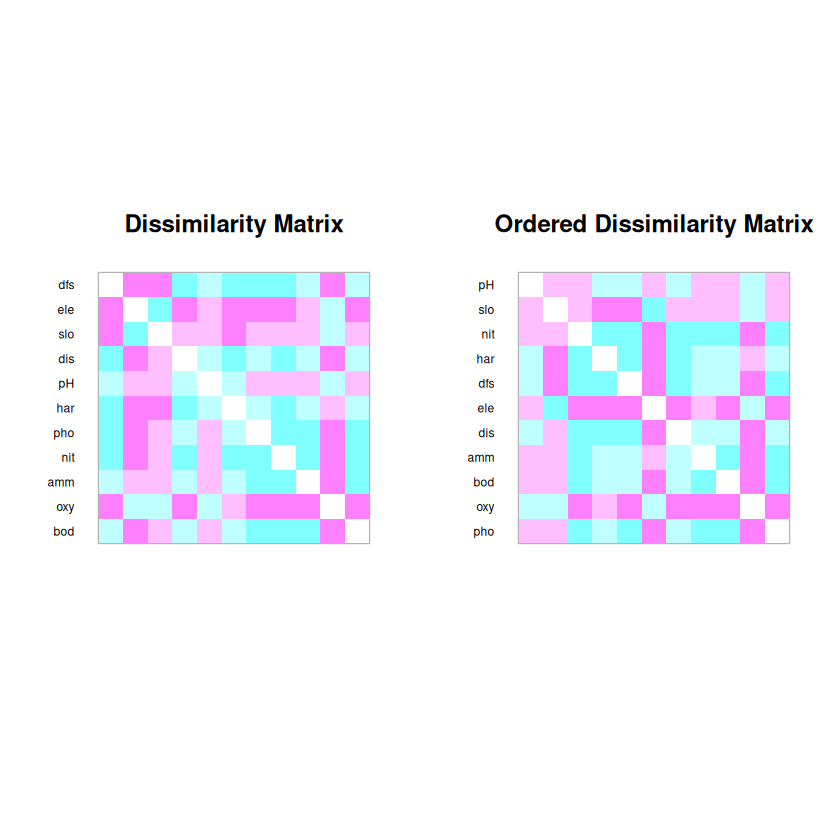

In [145]:
# Pearson r linear correlation among environmental variables
env.pearson <- cor(env)	# default method = "pearson"
round(env.pearson, 2)
coldiss(env.pearson)

## 5.2  Kendall tau rank correlation -> cor(df, method = "kendall")

In [146]:
# Kendall tau rank correlation among environmental variables
env.ken <- cor(env, method = "kendall")
env.ken

,dfs,ele,slo,dis,pH,har,pho,nit,amm,oxy,bod
dfs,1.00000000,-1.00000000,-0.61808412,0.97536946,0.03268505,0.6000675,0.5665032,0.66007426,0.43865122,-0.3940456,0.3514895
ele,-1.00000000,1.00000000,0.61808412,-0.97536946,-0.03268505,-0.6000675,-0.5665032,-0.66007426,-0.43865122,0.3940456,-0.3514895
slo,-0.61808412,0.61808412,1.00000000,-0.62312970,-0.09485373,-0.4814534,-0.5879454,-0.55572015,-0.49771661,0.3499593,-0.3042375
dis,0.97536946,-0.97536946,-0.62312970,1.00000000,0.04902758,0.6050681,0.5715165,0.63507145,0.41238468,-0.3691060,0.3514895
pH,0.03268505,-0.03268505,-0.09485373,0.04902758,1.00000000,0.1410110,0.1413703,0.01105969,-0.05228407,0.1792655,-0.1177027
har,0.60006751,-0.60006751,-0.48145340,0.60506807,0.14101101,1.0000000,0.4860067,0.46192893,0.30129798,-0.2607603,0.2763959
pho,0.56650323,-0.56650323,-0.58794536,0.57151653,0.14137027,0.4860067,1.0000000,0.61068900,0.58541922,-0.5152351,0.4786274
nit,0.66007426,-0.66007426,-0.55572015,0.63507145,0.01105969,0.4619289,0.6106890,1.00000000,0.67458752,-0.4202545,0.4070557
amm,0.43865122,-0.43865122,-0.49771661,0.41238468,-0.05228407,0.3012980,0.5854192,0.67458752,1.00000000,-0.6835203,0.5490554
oxy,-0.39404560,0.39404560,0.34995926,-0.36910600,0.17926550,-0.2607603,-0.5152351,-0.42025451,-0.68352031,1.0000000,-0.6641792


## 5.3 Order single -> order.single(cor_df) 

In [152]:
# performs a hierarchical clustering 
# returns an object representing the clustering order of samples based on their similarity/distance.
env.o <- order.single(env.ken)
env.o

[1] 11  7  9  8  1  4  6  5 10  2  3